In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
dataset_positive = pd.read_json("English_Classification_TrainingData/epirecipes/full_format_recipes.json")

In [3]:
dataset_negative = pd.read_csv('English_Classification_TrainingData/eng.train_text_one_article_per_line.txt', sep="\n", header=None)
dataset_negative.insert(0, 'label', 'not_a_recipe')

In [4]:
def rewrite_col(col):
    value = ''
    try:
        value = "".join(col)
        return(value)
        #value = ''
    except:
        pass 
    
        

dataset_positive[0] = dataset_positive['directions'].apply(rewrite_col)

In [5]:
dataset_positive.head()
dataset = pd.DataFrame(dataset_positive[0])
dataset.insert(0, 'label', 'recipe')
frames = [dataset, dataset_negative]
training_data = pd.concat(frames)
training_data = training_data.dropna(subset=[0])
training_data.head()

,label,0
0,recipe,"1. Place the stock, lentils, celery, carrot, t..."
1,recipe,Combine first 9 ingredients in heavy medium sa...
2,recipe,In a large heavy saucepan cook diced fennel an...
3,recipe,Heat oil in heavy large skillet over medium-hi...
4,recipe,Preheat oven to 350°F. Lightly grease 8x8x2-in...


In [6]:
text_clf = Pipeline([('tfidf', TfidfVectorizer(min_df=5, max_df=0.7, sublinear_tf=True, ngram_range=(1,2), analyzer='word', max_features=10000)), ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)),])
text_clf.fit(training_data[0], training_data['label'])

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.7, max_features=10000,
                                 min_df=5, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=True,
                                 token_pattern='...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', lo

In [7]:
potential_apple_pie_recipes = pd.read_csv('Query-ChronAm-ApplePie_9May.tsv', header=None, sep='\t')
potential_apple_pie_recipes = potential_apple_pie_recipes[potential_apple_pie_recipes[2].str.contains("apple pie", na=False, case=False)]
potential_apple_pie_recipes = potential_apple_pie_recipes.rename(columns={0: "label", 2: "recipe_instruction"})
potential_apple_pie_recipes = potential_apple_pie_recipes.dropna(subset=['recipe_instruction'])

In [15]:
potential_apple_pie_recipes['after_pie'] = potential_apple_pie_recipes['recipe_instruction'].str.split('(?i)apple pie')

def get_100(s):
    r = []
    for x in s:
        l = x.split(" ")
        r.append(" ".join(l[:150]))
    return(r)

potential_apple_pie_recipes['after_pie_truncated'] = [get_100(s) for s in potential_apple_pie_recipes['after_pie'].values.tolist()]
potential_apple_pie_recipes = potential_apple_pie_recipes[potential_apple_pie_recipes['recipe_instruction'] != "None"]
potential_apple_pie_recipes = potential_apple_pie_recipes.explode('after_pie_truncated')
potential_apple_pie_recipes['after_pie_truncated']

0        m . I &*%****■ S~= -2— «««■ I lOckjA CRISP APP...
0         // r-^ __^ 1 Tender cvusf, fresh-Aavored appl...
0         you’ll be proud to serve. Tender k flaky crus...
0        . Superb results every single time —even for b...
0         on short notice. Any season of year! Do try P...
                               ...                        
84027    1.50 PER ANNUM. My ,1. 8. RICHARDSON, Auctione...
84027    , which she placed before him with a knife and...
84030    POPTLA NT) __ _ Established June 23, 1862. y„t...
84030                        . While we were eating i the 
84030    , iu came Mr. Washington, dress > ed iu Hauoah...
Name: after_pie_truncated, Length: 87496, dtype: object

In [16]:
predicted = pd.DataFrame(text_clf.predict(potential_apple_pie_recipes['after_pie_truncated']))
recipes = pd.merge(potential_apple_pie_recipes,predicted,how = 'left',left_index = True, right_index = True)
recipes.to_csv('ChronAm_SGDClassifier_epicurious__150words_after_occurrence_24May.tsv',sep='\t')


In [17]:
recipes.head()

,label,1,recipe_instruction,3,4,5,6,7,8,after_pie,after_pie_truncated,0
0,apple pie,/lccn/sn83045462/1947-06-22/ed-1/seq-119/,m . I &*%****■ S~= -2— «««■ I lOckjA CRISP APP...,19470622,NaN,NaN,Evening star. [volume],NaN,https://chroniclingamerica.loc.gov/lccn/sn8304...,[m . I &*%****■ S~= -2— «««■ I lOckjA CRISP AP...,m . I &*%****■ S~= -2— «««■ I lOckjA CRISP APP...,recipe
0,apple pie,/lccn/sn83045462/1947-06-22/ed-1/seq-119/,m . I &*%****■ S~= -2— «««■ I lOckjA CRISP APP...,19470622,NaN,NaN,Evening star. [volume],NaN,https://chroniclingamerica.loc.gov/lccn/sn8304...,[m . I &*%****■ S~= -2— «««■ I lOckjA CRISP AP...,"// r-^ __^ 1 Tender cvusf, fresh-Aavored appl...",recipe
0,apple pie,/lccn/sn83045462/1947-06-22/ed-1/seq-119/,m . I &*%****■ S~= -2— «««■ I lOckjA CRISP APP...,19470622,NaN,NaN,Evening star. [volume],NaN,https://chroniclingamerica.loc.gov/lccn/sn8304...,[m . I &*%****■ S~= -2— «««■ I lOckjA CRISP AP...,you’ll be proud to serve. Tender k flaky crus...,recipe
0,apple pie,/lccn/sn83045462/1947-06-22/ed-1/seq-119/,m . I &*%****■ S~= -2— «««■ I lOckjA CRISP APP...,19470622,NaN,NaN,Evening star. [volume],NaN,https://chroniclingamerica.loc.gov/lccn/sn8304...,[m . I &*%****■ S~= -2— «««■ I lOckjA CRISP AP...,. Superb results every single time —even for b...,recipe
0,apple pie,/lccn/sn83045462/1947-06-22/ed-1/seq-119/,m . I &*%****■ S~= -2— «««■ I lOckjA CRISP APP...,19470622,NaN,NaN,Evening star. [volume],NaN,https://chroniclingamerica.loc.gov/lccn/sn8304...,[m . I &*%****■ S~= -2— «««■ I lOckjA CRISP AP...,on short notice. Any season of year! Do try P...,recipe


In [20]:
recipes['Year'] = recipes[3].apply(str).str.slice(0,4)
quantity_re = r"(([0-9]{1,3}|one|[0-4]/[0-4]) (cup| cups|teaspoon|teaspoons|tablespoon|tablespoons|cupful|spoonful|lbs|pound) (sugar))"
recipes['quantity'] = recipes['after_pie_truncated'].str.extract(quantity_re, expand=True)[0]
recipes = recipes.dropna(subset=['quantity'])
recipes['converted'] = recipes['quantity'].replace(regex={r'one' :  '1', 'sugar' : ''})


In [21]:
def convert_to_float(frac_str):
    try:
        return float(frac_str)
    except ValueError:
        num, denom = frac_str.split('/')
        try:
            leading, num = num.split(' ')
            whole = float(leading)
        except ValueError:
            whole = 0
        frac = float(num) / float(denom)
        return whole - frac if whole < 0 else whole + frac

units = {'cup':200, 'cups':200, 'cupful':200, 'grams':1, 'teaspoon':4, 'teaspoons':4, 'tablespoon':12.5, 'tablespoons':12.5, 'spoonful':4, 'lbs':453.59, 'pound':453.59}

def conversion(x):
    for key in units.keys():
        if key in str(x):
            x = units[key]
            return int(x)    
    
result = recipes['converted'].str.split(pat=" ", expand=True)
result[0].map(convert_to_float)
result[1].map(conversion)

recipes['sugar_quantity'] = result[0].map(convert_to_float) * result[1].map(conversion)

#true_recipes['sugar_quantity'] = true_recipes['converted'].replace(regex={r"[A-Za-z ]*suiker$": ""})
recipes

recipes.dropna(subset=['sugar_quantity'])

,label,1,recipe_instruction,3,4,5,6,7,8,after_pie,after_pie_truncated,0,Year,quantity,converted,sugar_quantity
72,apple pie,/lccn/sn83045462/1942-12-07/ed-1/seq-37/,"All-American Dessert Apple Pie, in Any Delicio...",19421207,NaN,NaN,Evening star. [volume],B-18,https://chroniclingamerica.loc.gov/lccn/sn8304...,"[All-American Dessert , , in Any Delicious Ver...","are worth noting: “If apjfies are juicy, a si...",recipe,1942,one cup sugar,1 cup,200.0
72,apple pie,/lccn/sn83045462/1942-12-07/ed-1/seq-37/,"All-American Dessert Apple Pie, in Any Delicio...",19421207,NaN,NaN,Evening star. [volume],B-18,https://chroniclingamerica.loc.gov/lccn/sn8304...,"[All-American Dessert , , in Any Delicious Ver...",". (No. 1. Upper Left, and No. 4, Indi vidual. ...",recipe,1942,1 cup sugar,1 cup,200.0
72,apple pie,/lccn/sn83045462/1942-12-07/ed-1/seq-37/,"All-American Dessert Apple Pie, in Any Delicio...",19421207,NaN,NaN,Evening star. [volume],B-18,https://chroniclingamerica.loc.gov/lccn/sn8304...,"[All-American Dessert , , in Any Delicious Ver...",". (No. 7, Pictured.) 2 cups chopped tart apple...",recipe,1942,4 cup sugar,4 cup,800.0
72,apple pie,/lccn/sn83045462/1942-12-07/ed-1/seq-37/,"All-American Dessert Apple Pie, in Any Delicio...",19421207,NaN,NaN,Evening star. [volume],B-18,https://chroniclingamerica.loc.gov/lccn/sn8304...,"[All-American Dessert , , in Any Delicious Ver...",. DEEP DISH. (No. 8. Pictured.) 10 tart apples...,recipe,1942,1 cup sugar,1 cup,200.0
83,apple pie,/lccn/sn86075096/1952-09-15/ed-1/seq-25/,An Editorial \ Tall Apples NO APPLE PIE is qui...,19520915,NaN,NaN,Montana farmer-stockman. [volume],25,https://chroniclingamerica.loc.gov/lccn/sn8607...,"[An Editorial \ Tall Apples NO , is quite so ...",—that great American dessert—we salute it.—Amy...,recipe,1952,1 cup sugar,1 cup,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73099,apple pie,/lccn/sn78000395/1912-06-08/ed-1/seq-5/,"»y BEST OF SHORTCAKES, Best served warm and do...",19120608,NaN,NaN,The labor world. [volume],NaN,https://chroniclingamerica.loc.gov/lccn/sn7800...,"[»y BEST OF SHORTCAKES, Best served warm and d...",". One can pineapple, one cup sugar, two cups w...",recipe,1912,one cup sugar,1 cup,200.0
76348,apple pie,/lccn/sn85034357/1920-08-06/ed-1/seq-3/,RADFORD STATE NORMAL. Train young women for te...,19200806,NaN,NaN,Clinch Valley news. [volume],NaN,https://chroniclingamerica.loc.gov/lccn/sn8503...,[RADFORD STATE NORMAL. Train young women for t...,1V4 cups flour 1% tcaupoona Royal Baking Powd...,recipe,1920,2 tablespoons sugar,2 tablespoons,24.0
76349,apple pie,/lccn/sn85034357/1920-08-06/ed-1/seq-3/,RADFORD STATE NORMAL. Train young women for te...,19200806,NaN,NaN,Clinch Valley news. [volume],NaN,https://chroniclingamerica.loc.gov/lccn/sn8503...,[RADFORD STATE NORMAL. Train young women for t...,1V4 cups flour 1% tcaupoona Royal Baking Powd...,not_a_recipe,1920,2 tablespoons sugar,2 tablespoons,24.0
77876,apple pie,/lccn/sn85035720/1921-03-30/ed-2/seq-7/,[ WOMAN’S I NTORESTS AND SUGGESTIONS FOR HOMEM...,19210330,NaN,NaN,Perth Amboy evening news. [volume],7,https://chroniclingamerica.loc.gov/lccn/sn8503...,[[ WOMAN’S I NTORESTS AND SUGGESTIONS FOR HOME...,. coffee. Mj Ow n Recipes Although brisket con...,recipe,1921,1 cup sugar,1 cup,200.0


In [29]:
recipes = recipes[recipes['Year'].astype(int) > 1829] 
# Only select entries that are classified as recipes
recipes = recipes[recipes[0].isin(['recipe'])]



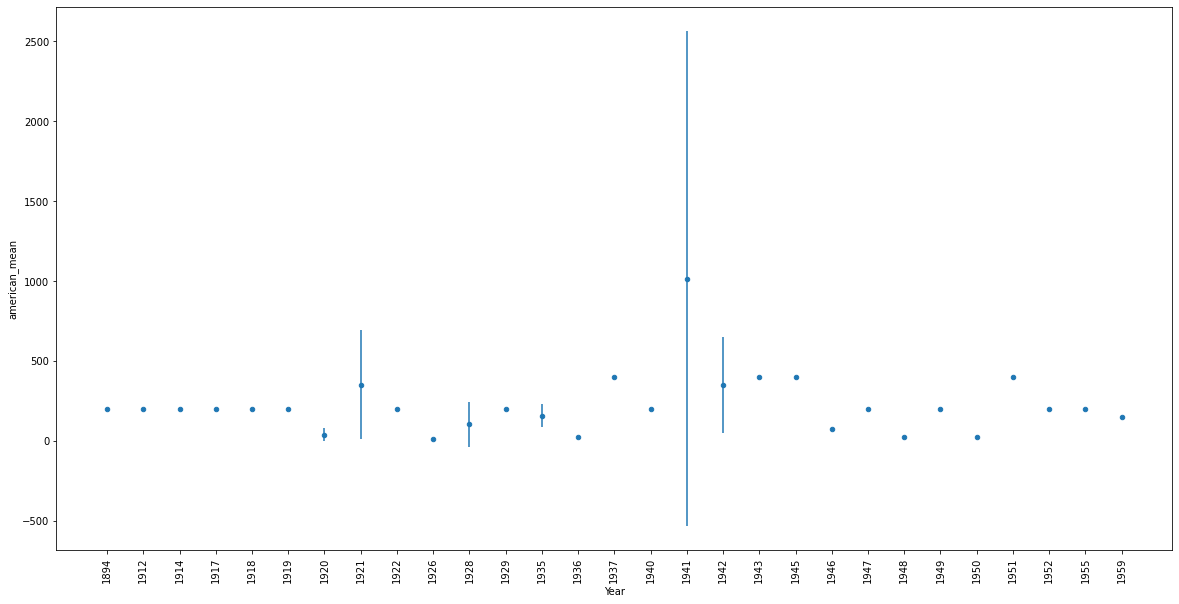

In [30]:
df4 = pd.DataFrame(recipes.groupby('Year')['sugar_quantity'].mean()).reset_index()
df4 = df4.rename(columns={"sugar_quantity": "american_mean"})
df5 = pd.DataFrame(recipes.groupby('Year')['sugar_quantity'].std()).reset_index()
df5 = df5.rename(columns={"sugar_quantity": "american_std"})
df6 = pd.merge(df4, df5, on='Year')

df6.plot.scatter(x='Year', y='american_mean', yerr='american_std', rot=90, figsize=(20,10))

In [31]:
bins = [1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970]
recipes['binned'] = pd.cut(recipes['Year'].astype(int), bins)
recipes.head()

,label,1,recipe_instruction,3,4,5,6,7,8,after_pie,after_pie_truncated,0,Year,quantity,converted,sugar_quantity,binned
72,apple pie,/lccn/sn83045462/1942-12-07/ed-1/seq-37/,"All-American Dessert Apple Pie, in Any Delicio...",19421207,NaN,NaN,Evening star. [volume],B-18,https://chroniclingamerica.loc.gov/lccn/sn8304...,"[All-American Dessert , , in Any Delicious Ver...","are worth noting: “If apjfies are juicy, a si...",recipe,1942,one cup sugar,1 cup,200.0,"(1940, 1950]"
72,apple pie,/lccn/sn83045462/1942-12-07/ed-1/seq-37/,"All-American Dessert Apple Pie, in Any Delicio...",19421207,NaN,NaN,Evening star. [volume],B-18,https://chroniclingamerica.loc.gov/lccn/sn8304...,"[All-American Dessert , , in Any Delicious Ver...",". (No. 1. Upper Left, and No. 4, Indi vidual. ...",recipe,1942,1 cup sugar,1 cup,200.0,"(1940, 1950]"
72,apple pie,/lccn/sn83045462/1942-12-07/ed-1/seq-37/,"All-American Dessert Apple Pie, in Any Delicio...",19421207,NaN,NaN,Evening star. [volume],B-18,https://chroniclingamerica.loc.gov/lccn/sn8304...,"[All-American Dessert , , in Any Delicious Ver...",". (No. 7, Pictured.) 2 cups chopped tart apple...",recipe,1942,4 cup sugar,4 cup,800.0,"(1940, 1950]"
72,apple pie,/lccn/sn83045462/1942-12-07/ed-1/seq-37/,"All-American Dessert Apple Pie, in Any Delicio...",19421207,NaN,NaN,Evening star. [volume],B-18,https://chroniclingamerica.loc.gov/lccn/sn8304...,"[All-American Dessert , , in Any Delicious Ver...",. DEEP DISH. (No. 8. Pictured.) 10 tart apples...,recipe,1942,1 cup sugar,1 cup,200.0,"(1940, 1950]"
83,apple pie,/lccn/sn86075096/1952-09-15/ed-1/seq-25/,An Editorial \ Tall Apples NO APPLE PIE is qui...,19520915,NaN,NaN,Montana farmer-stockman. [volume],25,https://chroniclingamerica.loc.gov/lccn/sn8607...,"[An Editorial \ Tall Apples NO , is quite so ...",—that great American dessert—we salute it.—Amy...,recipe,1952,1 cup sugar,1 cup,200.0,"(1950, 1960]"


<ErrorbarContainer object of 3 artists>

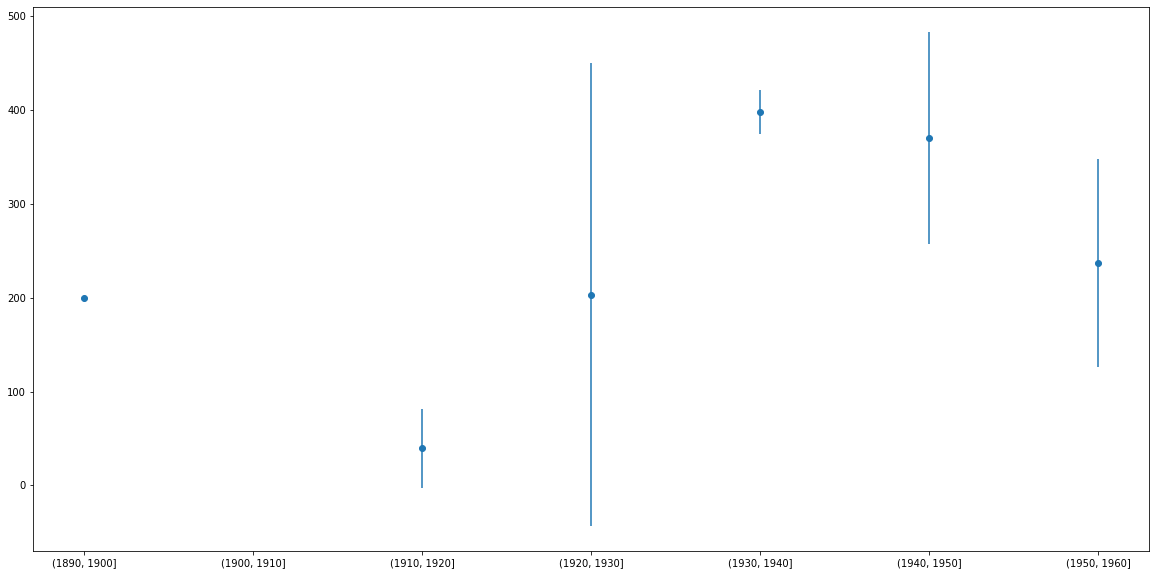

In [32]:
df4_b = pd.DataFrame(recipes.groupby('binned')['sugar_quantity'].mean()).reset_index()
df4_b = df4_b.rename(columns={"sugar_quantity": "mean"})
df5_b = pd.DataFrame(recipes.groupby('binned')['sugar_quantity'].std()).reset_index()
df5_b = df5_b.rename(columns={"sugar_quantity": "std"})
df6_b = pd.merge(df4_b, df5_b, on='binned')
plt.figure(figsize=(20,10))
plt.errorbar(df6_b['binned'].astype(str), df6_b['mean'], df6_b['std'], fmt='o')

In [33]:
df6.to_csv('ChronAm_quantities_std_per_year_cleaned.tsv',sep='\t')